# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# When I finished the cleaning and formatting part, I realized that because of the high number of duplicates, it was more convenient to drop them at the beginning

In [3]:
df = df.drop_duplicates()

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df = df.rename(columns={"st":"state"})

df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,Cali,F,High School or Below,2031499.76%,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,899704.02%,54230.0,112.0,1/0/00,Personal Auto,Two-Door Car,537.600000


In [5]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [6]:
null_counts = {}

for column in df.columns:
    count_nan = df[column].isna().sum()
    null_counts[column] = count_nan
    
print(null_counts)


{'customer': 1, 'state': 1, 'gender': 118, 'education': 1, 'customer_lifetime_value': 4, 'income': 1, 'monthly_premium_auto': 1, 'number_of_open_complaints': 1, 'policy_type': 1, 'vehicle_class': 1, 'total_claim_amount': 1}


In [7]:
for column in df:
    print(df[column].value_counts())

customer
RB50392    1
HJ15383    1
AO74776    1
HQ82233    1
OL72737    1
          ..
RO26085    1
ES57969    1
JK55587    1
RN97635    1
MY31220    1
Name: count, Length: 1071, dtype: int64
state
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64
gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64
education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64
customer_lifetime_value
445811.34%     4
251459.20%     4
272535.64%     3
578018.22%     3
684615.03%     3
              ..
245357.08%     1
507566.27%     1
321497.94%     1
1227534.31%    1
899704.02%     1
Name: count, Length: 1027, dtype: int64
income
0.0        252
43860.0      4
17622.0      4
36650.0      3
14072.0

In [8]:
#Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F"
df['gender'].unique() # check the unique values in the column

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [9]:
# Compared to the total number of rows, there aren't many null values, so I decide to replace them with the mode

In [10]:
df.gender.mode()

0    F
Name: gender, dtype: object

In [11]:
df['gender'] = df['gender'].fillna('F')

In [12]:
df['gender']=np.where(df['gender'].isin(['F','female','Femal']), 'F', 'M')
df['gender'].value_counts()

gender
F    620
M    452
Name: count, dtype: int64

In [13]:
## THIS CODE IS FROM MY FIRST ATTEMPT
# # Now define a function to clean the column
# def clean(x):
#     if x in ['M', 'Male']:
#         return 'Male'
#     elif x in ['F', 'Femal','female']:
#         return 'Female'
# #     else:
# #         return 'U'
    
# # Replace NaN values with a placeholder value
# # df['gender'].fillna('U', inplace=True)


# df['gender'] = list(map(clean, df['gender']))

In [14]:
# df['gender'].value_counts()

In [15]:
df['gender'].isna().sum()

0

In [16]:
# Check again
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
#State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [18]:
df['state'].replace({"AZ": "Arizona", "WA": "Washington", "Cali":"California"}, inplace=True)


In [19]:
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [20]:
#In education, "Bachelors" could be replaced by "Bachelor
df['education'].replace({"Bachelors":"Bachelor"}, inplace=True)

In [21]:
# Check again
(df["education"].unique())

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [22]:
# In Customer Lifetime Value, delete the `%` character
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'].str.rstrip('%').astype(float) , errors='coerce')/ 100

display(df.head(20))

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,College,5380.8986,55350.0,67.0,1/0/00,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,Master,7216.1003,0.0,101.0,1/0/00,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,Bachelor,24127.5040,14072.0,71.0,1/0/00,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,College,7388.1781,28812.0,93.0,1/0/00,Special Auto,Four-Door Car,425.527834


In [23]:
# In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
df['vehicle_class'].unique()
df['vehicle_class'].replace({"Sports Car":"Luxury" , "Luxury SUV":"Luxury" ,"Luxury Car":"Luxury" }, inplace=True)

In [24]:
# Check again
(df["vehicle_class"].unique())


array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

In [25]:
df.vehicle_class.value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [26]:
print(df.dtypes)
#I've already correct the data type of Customer lifetime value

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [27]:
df["number_of_open_complaints"].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [28]:
def middle_value(complaint):
    if isinstance(complaint, str):  # Check if it's a string
        parts = complaint.split('/')
        if len(parts) == 3:
            return int(parts[1])
    return None  # Return None for non-matching or non-string values


df['number_of_open_complaints'] = df['number_of_open_complaints'].apply(middle_value)

In [29]:
# Check again
(df["number_of_open_complaints"].unique())

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [30]:
# correcting data types
df['number_of_open_complaints'] = pd.to_numeric(df['number_of_open_complaints'], errors='coerce').astype('Int64')
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      Int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [31]:
(df["number_of_open_complaints"].unique())

<IntegerArray>
[0, 2, 1, 3, 5, 4, <NA>]
Length: 7, dtype: Int64

In [32]:
df.head(20)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,College,5380.8986,55350.0,67.0,0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,Master,7216.1003,0.0,101.0,0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,Bachelor,24127.5040,14072.0,71.0,0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,College,7388.1781,28812.0,93.0,0,Special Auto,Four-Door Car,425.527834


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [33]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,20314.9976,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.1247,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.8011,79487.0,114.0,0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,8997.0402,54230.0,112.0,0,Personal Auto,Two-Door Car,537.600000


In [34]:
null_count = df.isnull().sum()
null_count

customer                     1
state                        1
gender                       0
education                    1
customer_lifetime_value      4
income                       1
monthly_premium_auto         1
number_of_open_complaints    1
policy_type                  1
vehicle_class                1
total_claim_amount           1
dtype: int64

In [35]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      Int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [36]:
## IN MY FIRST ATTEMPT
# The number of rows with null values is hughe, so I think drop the rows is not a good idea
# I apply different strategy for numeric variables (median) than from categorical (mode) 
# I choose this trying to preserve the data while mitigating the impact of missing values

#IN MY FINAL VERSION:
#I have drop the duplicates so the number of null values is so small that I decidet to drop them and also use the mean for the 3 null values of customer_lifetime_value 

In [37]:
mean=df['customer_lifetime_value'].mean()
df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(mean)
df['customer_lifetime_value']

0        7936.902593
1        6979.535900
2       12887.431700
3        7645.861800
4        5363.076500
            ...     
1067    20314.997600
1068     3239.124700
1069     4626.801100
1070     8997.040200
1071     7936.902593
Name: customer_lifetime_value, Length: 1072, dtype: float64

In [38]:
null_count = df.isnull().sum()
null_count

customer                     1
state                        1
gender                       0
education                    1
customer_lifetime_value      0
income                       1
monthly_premium_auto         1
number_of_open_complaints    1
policy_type                  1
vehicle_class                1
total_claim_amount           1
dtype: int64

In [39]:
df = df.dropna()

In [40]:
null_count = df.isnull().sum()
null_count

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [41]:
df.shape

(1071, 11)

In [42]:
## THIS CODE IS FROM MY FIRST ATTEMPT
# #numeric variables
# df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].mean(), inplace=True)
# df['income'].fillna(df['income'].mean(), inplace=True)
# df['monthly_premium_auto'].fillna(df['monthly_premium_auto'].mean(), inplace=True)
# df['total_claim_amount'].fillna(df['total_claim_amount'].mean(), inplace=True)

In [43]:
## THIS CODE IS FROM MY FIRST ATTEMPT
# # categorical variables
# df['state'].fillna(df['state'].mode()[0], inplace=True)
# # df['gender'].fillna(df['gender'].mode()[0], inplace=True)
# df['education'].fillna(df['education'].mode()[0], inplace=True)
# df['policy_type'].fillna(df['policy_type'].mode()[0], inplace=True)
# # df['vehicle_class'].fillna(df['vehicle_class'].mode()[0], inplace=True)
# df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].mode()[0], inplace=True)

In [44]:
## THIS CODE IS FROM MY FIRST ATTEMPT
## For customer I think is better to fill with an X, this way I can see which one is authentic and which not
# df['customer'].fillna("X", inplace=True)

In [45]:
## THIS CODE IS FROM MY FIRST ATTEMPT
# #Check
# null_count = df.isnull().sum()
# null_count

In [46]:
#After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`
numeric_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']

def convert_to_integer(value):
    if isinstance(value, (int, float)):
        return int(value)
    return value

df[numeric_columns] = df[numeric_columns].applymap(convert_to_integer)

C:\Users\laiag\AppData\Local\Temp\ipykernel_21176\101784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].applymap(convert_to_integer)


In [47]:
df.dtypes

customer                     object
state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     Int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [48]:
## THIS CODE IS FROM MY FIRST ATTEMPT
# df.duplicated()
# duplicated_count = df.duplicated().sum()
# display(duplicated_count)
## At this point, I think maybe I've just should drop the rows with null values
## Then now I choose this strategy and drop all the duplicate rows that are exactly the same
# df.drop_duplicates()

In [49]:
# Exporting this processed data to a csv
df.to_csv('clean_df.csv') 

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [50]:
df2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')


In [51]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    df = df.rename(columns={'st':'state'})
    df = df.drop_duplicates()
    df = df.drop(1071, axis = 0)
    df['gender']= df['gender'].fillna('F')
    df['gender']=np.where(df['gender'].isin(['F', 'female', 'Femal']),'F','M')
    df['customer_lifetime_value']=df['customer_lifetime_value'].str.replace('%','').astype(float)/100
    new_list = []
    for item in df['number_of_open_complaints']:
        new_list.append(item.split('/')[1])
    df['number_of_open_complaints']=new_list
    df['number_of_open_complaints']=pd.to_numeric(df['number_of_open_complaints'], errors = 'coerce')
    df['customer_lifetime_value']=pd.to_numeric(df['customer_lifetime_value'], errors='coerce')
    df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].mean()).round(decimals = 2)
    
    return df

In [52]:
df2 = clean_df(df2)
df2

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [53]:
# Your code here
df2[['total_claim_amount','customer_lifetime_value']].describe(include = 'all')

,total_claim_amount,customer_lifetime_value
count,1071.000000,1071.000000
mean,404.986909,7936.902521
std,293.027260,6425.757110
min,0.382107,2004.350000
25%,202.157702,4048.535000
50%,354.729129,5887.180000
75%,532.800000,8945.210000
max,2893.239678,58166.550000


In [54]:

high_tot_claim_amt= df2[df2['total_claim_amount'] > 532.8]
low_cust_life_val= df2[df2['customer_lifetime_value']< 4048.535]

#https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
target_customers = df2.loc[(df2['total_claim_amount'] >= 532.8) & (df2['customer_lifetime_value']<= 4048.535)]
display(target_customers.shape)
target_customers
                   

(41, 11)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
17,OE15005,Cali,F,College,3945.24,28855.0,101.0,0,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,F,Bachelor,2450.19,0.0,73.0,3,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,F,Bachelor,3946.37,0.0,111.0,0,Personal Auto,Four-Door Car,799.200000
38,CM61827,Oregon,F,Bachelor,3090.03,0.0,90.0,0,Personal Auto,Two-Door Car,648.000000
42,IL19217,California,F,Bachelor,3939.01,60021.0,99.0,0,Personal Auto,Four-Door Car,882.871945
62,FG63582,Oregon,F,Bachelor,3339.76,0.0,94.0,0,Personal Auto,Two-Door Car,863.327324
135,MS41162,AZ,F,High School or Below,4022.96,0.0,117.0,0,Personal Auto,SUV,975.107098
140,DS81757,Oregon,M,College,2470.12,0.0,74.0,0,Personal Auto,Two-Door Car,721.242206
158,KA61892,Arizona,M,College,3873.65,28142.0,105.0,0,Personal Auto,Sports Car,701.708239
160,ND87334,California,M,High School or Below,2287.60,0.0,63.0,0,Corporate Auto,Two-Door Car,679.368378


# Lab | Customer Analysis Round 3


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data

Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   1071 non-null   object
 1   state                      1071 non-null   object
 2   gender                     1071 non-null   object
 3   education                  1071 non-null   object
 4   customer_lifetime_value    1071 non-null   int64 
 5   income                     1071 non-null   int64 
 6   monthly_premium_auto       1071 non-null   int64 
 7   number_of_open_complaints  1071 non-null   Int64 
 8   policy_type                1071 non-null   object
 9   vehicle_class              1071 non-null   object
 10  total_claim_amount         1071 non-null   int64 
dtypes: Int64(1), int64(4), object(6)
memory usage: 101.5+ KB


In [56]:
df.shape

(1071, 11)

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7936.403361,6425.757938,2004.0,4048.0,5887.0,8945.0,58166.0
income,1071.0,39295.701214,30469.42706,0.0,14072.0,36234.0,64631.0,99960.0
monthly_premium_auto,1071.0,193.23436,1601.190369,61.0,68.0,83.0,109.5,35354.0
number_of_open_complaints,1071.0,0.394024,0.883769,0.0,0.0,0.0,0.0,5.0
total_claim_amount,1071.0,404.528478,293.04185,0.0,201.5,354.0,532.0,2893.0


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Show a plot of the Gender breakdown.
gender_counts = df['gender'].value_counts()

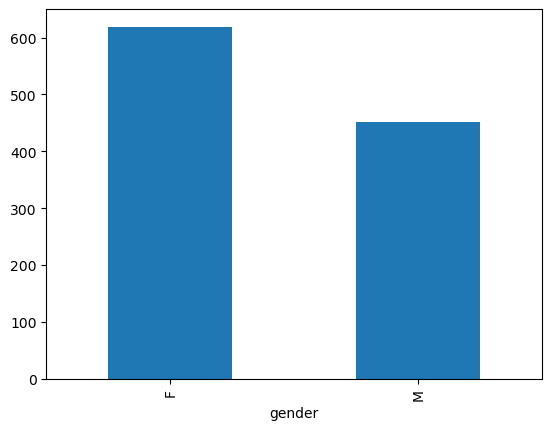

In [60]:
gender_counts.plot(kind='bar')
plt.show()

#sns.countplot(x='gender', data= 'df')

In [61]:
#There are more Female clients than Male clients

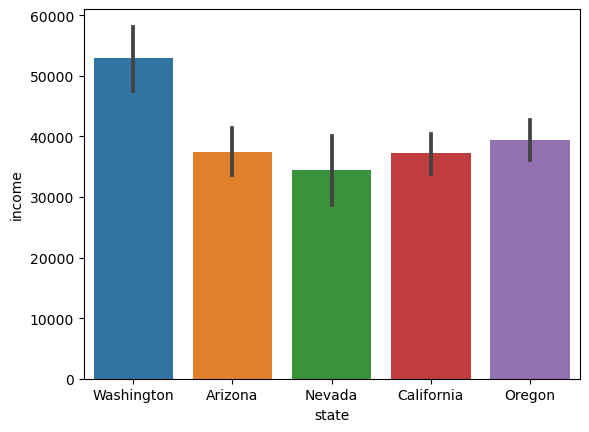

In [62]:
# Show a plot of Income by State.
sns.barplot(y="income", x="state", data=df)
plt.show()

In [63]:
#The clients in Washington State have the highest income averages


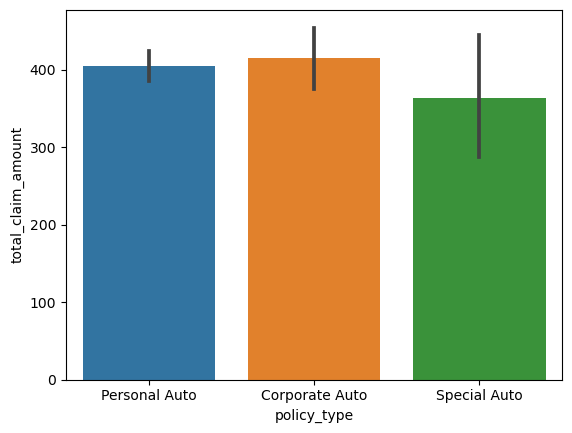

In [64]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=df)
plt.show()

In [65]:
#The Corporate policies have the highest average claim amounts, 
#but there is little difference with Personal policies

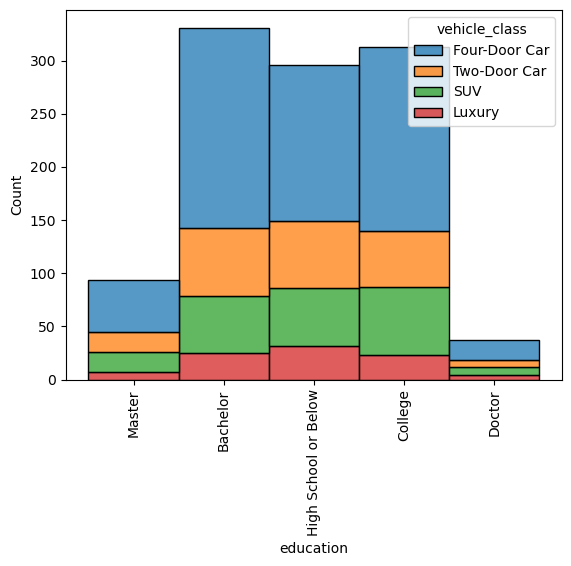

In [66]:
# Show a plot of the Education by Vehicle Class., 
g = sns.histplot(data=df, x='education', hue='vehicle_class', stat='count', multiple='stack')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()


In [67]:
#The most luxury cars are insured for people with only a high school or below education level!

# Lab | Customer Analysis Round 4

## Complete the following task

- Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution
  - For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [68]:
df.dtypes

customer                     object
state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     Int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

In [69]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = object)

In [70]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,7936.403361,6425.757938,2004.0,4048.0,5887.0,8945.0,58166.0
income,1071.0,39295.701214,30469.42706,0.0,14072.0,36234.0,64631.0,99960.0
monthly_premium_auto,1071.0,193.23436,1601.190369,61.0,68.0,83.0,109.5,35354.0
number_of_open_complaints,1071.0,0.394024,0.883769,0.0,0.0,0.0,0.0,5.0
total_claim_amount,1071.0,404.528478,293.04185,0.0,201.5,354.0,532.0,2893.0


<AxesSubplot: xlabel='monthly_premium_auto', ylabel='count'>

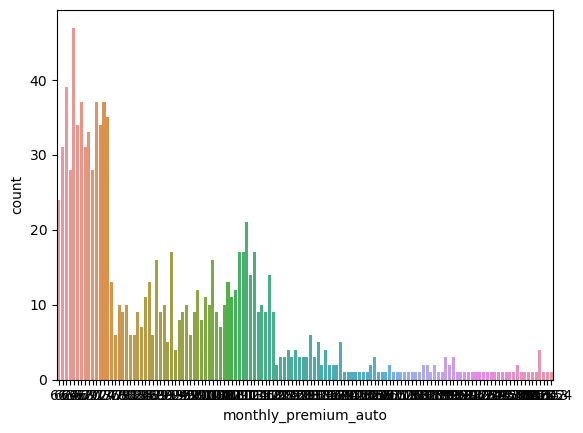

In [71]:
sns.countplot(data= df_num,x='monthly_premium_auto')


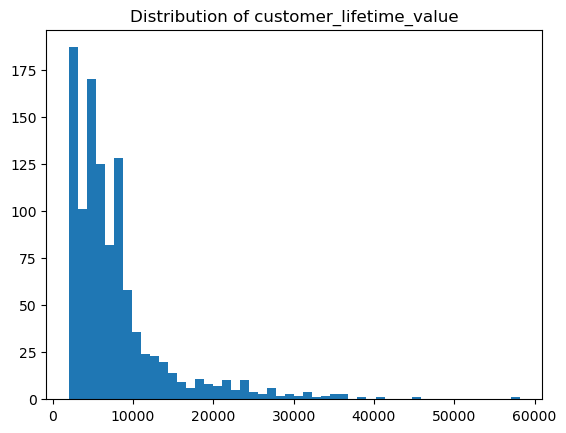

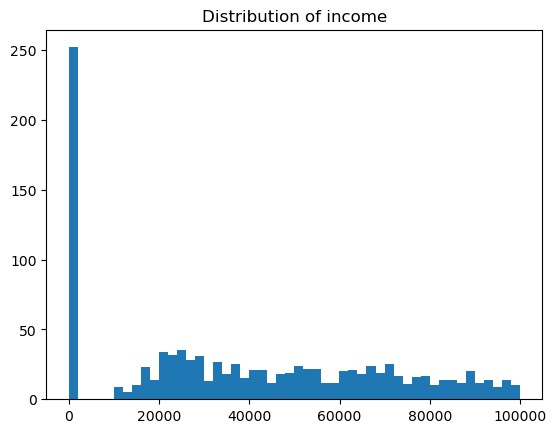

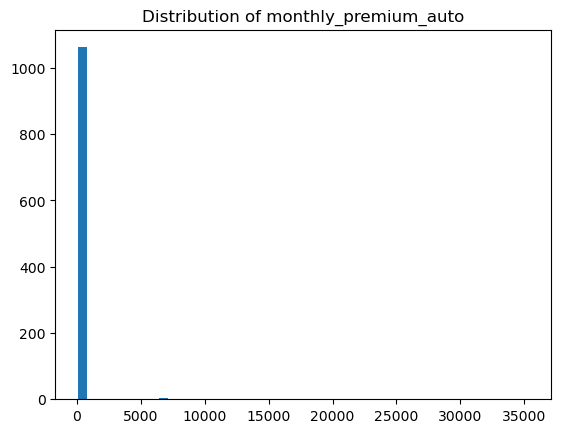

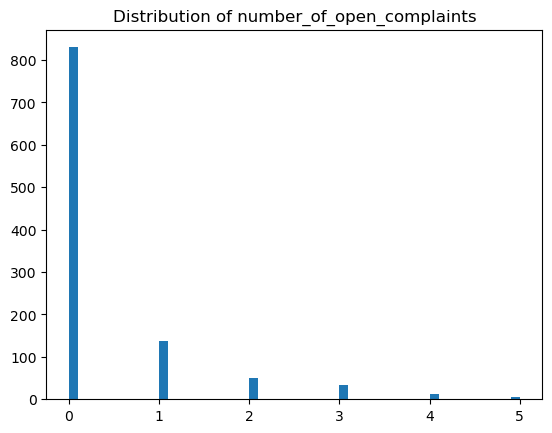

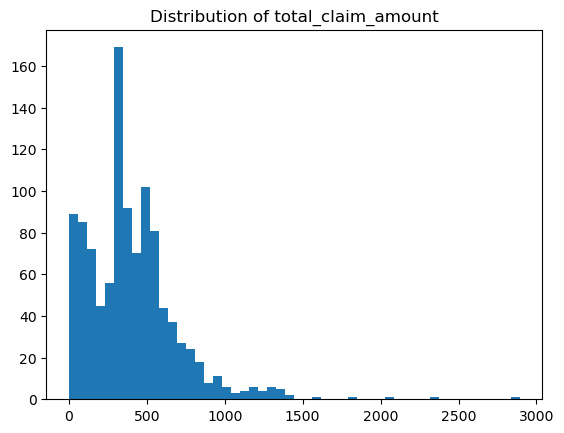

In [72]:
for col in df_num:
    plt.hist(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()


In [73]:
# There is not normal distribuiton because the graphs aren't bell-shaped and symmetric about the mean

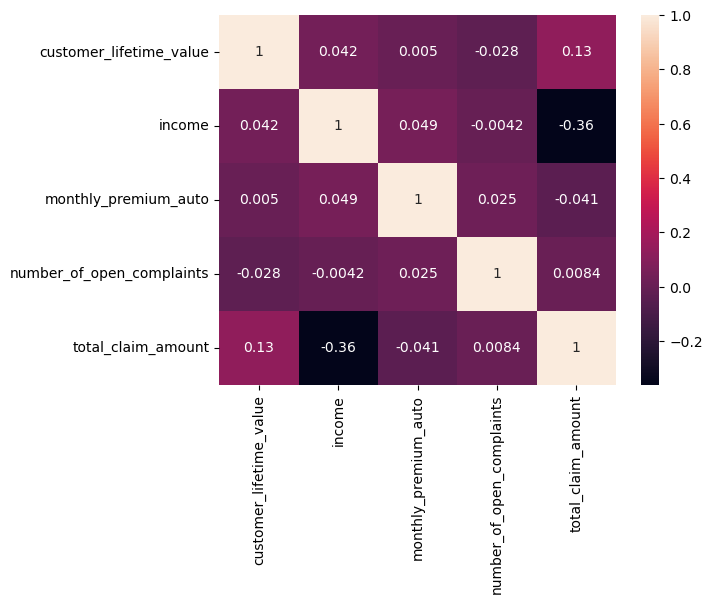

In [74]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [75]:
# There is not quite correlation between the features

# Lab | Customer Analysis Round 5

## Processing Data

(Further processing...)

- X-y split.
- Scaling (numerical).

In [76]:
from sklearn.preprocessing import MinMaxScaler 

y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [77]:
# drop useless column: customers
X_cat =X_cat.drop(['customer'], axis=1)

In [78]:
X_cat

,state,gender,education,policy_type,vehicle_class
0,Washington,F,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1067,California,F,High School or Below,Personal Auto,SUV
1068,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,California,F,Master,Special Auto,SUV


In [79]:
X_num

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,7936,0,1000,0
1,6979,0,94,0
2,12887,48767,108,0
3,7645,0,106,0
4,5363,36357,68,0
...,...,...,...,...
1066,3059,38644,78,1
1067,20314,63209,102,2
1068,3239,16061,88,0
1069,4626,79487,114,0


In [80]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized, columns=X_num.columns)

(1071, 4)


In [81]:
X_normalized

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.105623,0.000000,0.026606,0.0
1,0.088583,0.000000,0.000935,0.0
2,0.193779,0.487865,0.001332,0.0
3,0.100442,0.000000,0.001275,0.0
4,0.059809,0.363715,0.000198,0.0
...,...,...,...,...
1066,0.018785,0.386595,0.000482,0.2
1067,0.326021,0.632343,0.001162,0.4
1068,0.021990,0.160674,0.000765,0.0
1069,0.046686,0.795188,0.001502,0.0


# Lab | Customer Analysis Round 6

## Continuing Processing Data

- One Hot/Label Encoding (categorical).
- Concat DataFrames
#### Linear Regression
- Train-test split.
- Apply linear regression.
#### Model Validation
- Description:
  - R2.
  - MSE.
  - RMSE.
  - MAE.

In [82]:
X_cat.head()

,state,gender,education,policy_type,vehicle_class
0,Washington,F,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car


In [83]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
cols = encoder.get_feature_names(input_features=X_cat.columns)

encoded = encoder.transform(X_cat).toarray()
print(encoded)
print(encoder.categories_)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()
# in this case I think we just have nominal categorical data



[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]


C:\Users\laiag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([X_normalized, onehot_encoded], axis=1)  # np.concatenate()

In [85]:
print(X.shape)
X.head()

(1071, 18)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.105623,0.000000,0.026606,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.088583,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.100442,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.059809,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
print(y.shape)
y.head()

(1071,)


0       2
1    1131
2     566
3     529
4      17
Name: total_claim_amount, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 18)
(215, 18)
(856,)
(215,)


In [89]:
X_train.head()


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
1010,0.097183,0.702911,0.000907,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
688,0.167836,0.932473,0.000283,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
243,0.078416,0.500080,0.000652,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
948,0.177736,0.875950,0.001048,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
798,0.006926,0.000000,0.000255,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [90]:
y_train.head()

1010      7
688      74
243     566
948     470
798     425
Name: total_claim_amount, dtype: int64

## Linear Regression

In [91]:
#we train/fit our model 
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Validation

In [92]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.38375675569030887

In [93]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.31301842944346214

In [94]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

43337.05115666175

In [95]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

208.17552967787003

In [96]:
y_test.mean()

390.0883720930233

In [97]:
from sklearn.metrics import mean_absolute_error, r2_score


In [98]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)


156.81896552585275


# Lab | Customer Analysis Round 7

##  Try to improve the linear regression model

Some approaches you can try in this exercise:
- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Use the concept of multicollinearity and remove insignificant variables

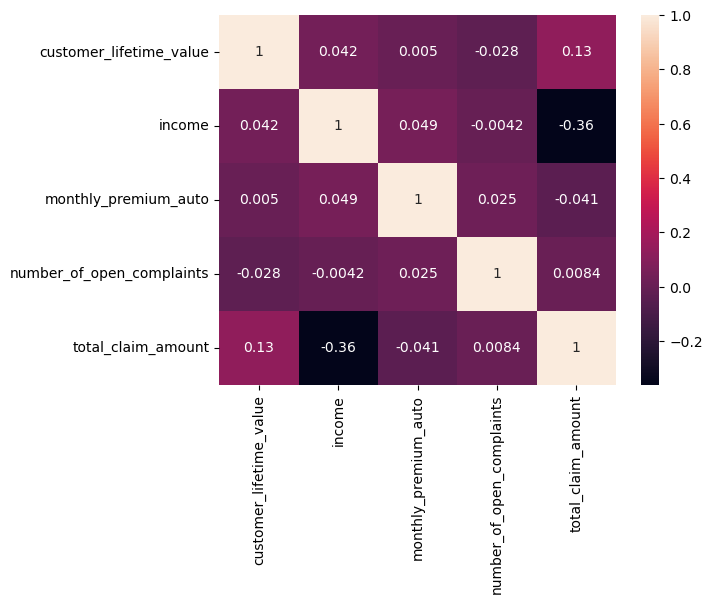

In [99]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [100]:
# Analysing the multicollinearity I can see that there is not much corralation between the variables, even that I can try to drop this ones that have less correlation: NUMBER OF OPEN COMPLAINS AND MONTHLY PREMIUM AUTO   

In [101]:
X_num2 = X_num.select_dtypes(include = np.number).drop(['monthly_premium_auto','number_of_open_complaints'], axis=1)
X_num2 

,customer_lifetime_value,income
0,7936,0
1,6979,0
2,12887,48767
3,7645,0
4,5363,36357
...,...,...
1066,3059,38644
1067,20314,63209
1068,3239,16061
1069,4626,79487


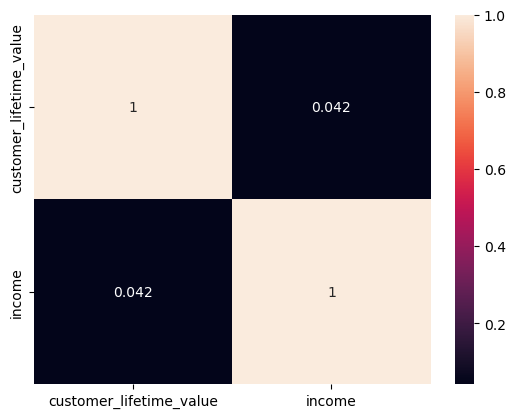

In [102]:
correlations_matrix = X_num2.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [103]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num2)
X_normalized2 = transformer.transform(X_num2)
print(X_normalized2.shape)
X_normalized2 = pd.DataFrame(X_normalized2, columns=X_num2.columns)

(1071, 2)


In [104]:
X2 = pd.concat([X_normalized2, onehot_encoded], axis=1)  # np.concatenate()

In [105]:
print(X2.shape)
X2.head()

(1071, 16)


,customer_lifetime_value,income,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.105623,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.088583,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193779,0.487865,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.100442,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.059809,0.363715,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 18)
(215, 18)
(856,)
(215,)


In [108]:
lm2 = linear_model.LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [109]:
predictions2 = lm2.predict(X2_train)
r2_score(y2_train, predictions2)

0.3831600699743769

In [110]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test2 = lm2.predict(X2_test)
r2_score(y2_test, predictions_test2)

0.3147294990189805

In [111]:
mse2=mean_squared_error(y2_test,predictions_test2)
mse

43337.05115666175

In [112]:
rmse2 = np.sqrt(mean_squared_error(y2_test,predictions_test2))
rmse

208.17552967787003

In [113]:
mae2 = mean_absolute_error(y2_test, predictions_test2)
print(mae)

156.81896552585275


In [114]:
# Definatly the result is practically the same

###  Use a different method of scaling the numerical variables

In [115]:
# scaling standard scaler: make data distributed with mean=0 and std=1
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
standardized = pd.DataFrame(x_standardized, columns=X_num.columns)
standardized.head()


(1071, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,-0.000063,-1.290279,0.504089,-0.446053
1,-0.149064,-1.290279,-0.062004,-0.446053
2,0.770790,0.310991,-0.053257,-0.446053
3,-0.045370,-1.290279,-0.054506,-0.446053
4,-0.400670,-0.096493,-0.078250,-0.446053


In [116]:
X_stand = pd.concat([standardized, onehot_encoded], axis=1)  # np.concatenate()

In [117]:
X_stand

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,-0.000063,-1.290279,0.504089,-0.446053,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.149064,-1.290279,-0.062004,-0.446053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.770790,0.310991,-0.053257,-0.446053,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.045370,-1.290279,-0.054506,-0.446053,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.400670,-0.096493,-0.078250,-0.446053,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,-0.759394,-0.021399,-0.072002,0.685992,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1067,1.927147,0.785196,-0.057006,1.818038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1068,-0.731369,-0.762914,-0.065753,-0.446053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1069,-0.515418,1.319686,-0.049508,-0.446053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [118]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stand, y, test_size=0.2, random_state=42)

In [119]:
print(X_train_s.shape)
print(X_test_s.shape)
print(y_train_s.shape)
print(y_test_s.shape)

(856, 18)
(215, 18)
(856,)
(215,)


In [120]:
#we train/fit our model 
from sklearn import linear_model

lm_stand = linear_model.LinearRegression()
lm_stand.fit(X_train_s,y_train_s)

LinearRegression()

In [121]:
predictions_test_stand = lm_stand.predict(X_test_s)
r2_score(y_test_s, predictions_test_stand)

0.31301842944346225

In [122]:
# Definatly the result is practically the same

### Use a different ratio of train test split

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [124]:
#we train/fit our model 
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [125]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.453603746317918

In [126]:
# It improves but just a little bit

### Use the transformation on numerical columns which align it more towards a normal distribution

In [127]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(X_num.values.reshape(-1, 1))
transformed_data

array([[ 0.85329252],
       [-1.2898621 ],
       [ 0.33102346],
       ...,
       [ 1.35399213],
       [-0.20053104],
       [-1.2898621 ]])

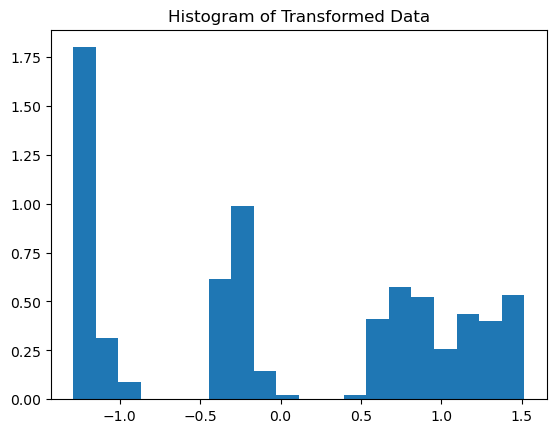

In [128]:
plt.hist(transformed_data, bins=20, density=True)
plt.title('Histogram of Transformed Data')
plt.show()


In [129]:
# I don't understand this well enough

In [130]:
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

# Lab | Customer Analysis Final Round

##  Reporting: Present results.


Key Findings and Observations

1. Gender Distribution:
   - The dataset shows a higher number of female clients compared to male clients. This gender disparity may have implications for marketing strategies and customer engagement.
   

2. Income by State:
   - Clients residing in Washington State have the highest average income. This information is valuable for tailoring insurance products and pricing to different regions.
   

3. Average Claim Amount by Policy Type:
   - Corporate policies have the highest average claim amounts. However, the difference in average claim amounts between Corporate and Personal policies is relatively small. This suggests a need to explore the factors contributing to these differences and to develop strategies to manage claims effectively.
   

4. Vehicle Class and Education Level:
   - It is noteworthy that individuals with a high school education or below tend to insure luxury cars. This insight can help in targeting specific educational groups for marketing and product development, especially in the luxury car insurance segment.
   

5. Data Distribution and Correlation:
   - The data distribution does not exhibit a normal distribution pattern as evident by the non-symmetrical, non-bell-shaped data distributions for numerical variables.
   - Correlation analysis suggests that there is not a strong linear relationship between the features, which may have implications for predictive modeling.
   

6. Linear Regression Model Evaluation:
   - The linear regression model performed poorly, as indicated by a low R-squared (r2) value, high Mean Squared Error (MSE), high Root Mean Squared Error (RMSE), and high Mean Absolute Error (MAE). This suggests that the model is not effectively capturing the relationships within the data.
   

7. Model Improvement Attempts:
   - Several attempts to improve the linear regression model were made:
     - Addressing multicollinearity by removing insignificant variables.
     - Using different methods of scaling numerical variables.
     - Trying different ratios for the train-test split.
   - However, these attempts did not lead to significant improvements in the model's performance.
   
 
In conclusion, the analysis of the vehicle insurance dataset has revealed important insights about customer demographics, income disparities, policy types, and claim amounts. While the dataset does not conform to a normal distribution and does not show strong correlations between features, these findings provide a foundation for further investigation and data-driven decision-making.

The underperformance of the linear regression model highlights the complexity of predicting customer behaviors and claim amounts in this context. Further advanced modeling techniques and feature engineering may be necessary to achieve more accurate predictions. This analysis serves as a starting point for ongoing research and strategic development in the insurance industry.